# Tree Based Models

Tree based models such as decision trees are a class of machine learning models that are used for both classification and regression. The model is essentially a series of binary questions, where the trained models resemble a tree, with branches and nodes that contains all the combination of responses. Tree based models are explicability models and are easy to understand and explain.

## Ensemble models

Ensemble models are machine learning models that use more than one predictor to arrive at a prediction. A group of predictors form an ensemble. In general, ensemble models perform better than using a single predictor (model) with improved efficiency and accuracy.

Ensemble learning can be classified as

- Bagging ensemble learning also referred as parallel ensemble
- Boosting ensemble learning also referred as sequntial ensemble

Decision trees have been used predominantly to construct bagging and boosting based models in machine learning.

### Bagging

A tree based model that aggregates the predictions of multiple trees is a Random Forest model. For it to be effective, the model needs a diverse collection of trees. Random Forest uses bootstrapping and aggregate results to perform operation and is also referred to as ***bagging ensemble model***.

### Boosting

Boosting is a process that uses a set of Machine Learning algorithms to combine weak learner to form strong learners in order to increase the accuracy of the model. The basic principle behind the working of boosting algorithms is to generate multiple weak learners and combine their predictions to form one strong rule.

- Step 1: The base algorithm reads the data and assigns equal weight to each sample observation


- Step 2: False predictions are assigned to the next base learner with a higher weightage on these incorrect predictions (increase the weightage on the misclassified samples)


- Step 3: Repeat step2 until the algo can correctly classify the output

![Figure1 ](https://www.edureka.co/blog/wp-content/uploads/2019/06/How-Does-Boosting-Algorithm-Work-Boosting-Machine-Learning-Edureka-min-528x254.png)

# Gradient Boosting

Gradient boosting trees are another ensemble model where tree models are arranged in a sequence. The model is built sequentially as each additional tree aims to correct the previously built model's predictions. A model with $M$ trees is equal to

$$ f_M(x_j) = \sum_{m=1}^M \gamma_m h_m (x_j) $$

, where $h_m$ is a **weak learner** decision tree.

**Additive Training**:  It is quite difficult to learn all the trees at once and we use an additive strategy which is fixing what it learned till last time step (tree) and add one new tree at a time. Then, we can write the prediction at step $\tilde{y}_i^{(t)}$. Then, we have,

$ f_0(x_j) = h_0 (x_j) $

$ f_1(x_j) = f_0(x_j) + \gamma_1 h_1 (x_j) $

$ f_2(x_j) = f_1(x_j) + \gamma_2 h_2 (x_j) $

$\cdots$

$ f_M(x_j) = f_{M-1}(x_j) + \gamma_M h_M (x_j) $

, where $m$ is the number of trees, $f$ is a function in the functional space $F$.

In random forest, diversification is achieved through many trees that will possibly improve the overall quality of the model. Gradient boosing algorithm combine multiple weak learners to form a strong learner.

The model is usually initialized with $h_0$ being equal to the mean of the training labels for regression or the majority class for classification. $\gamma_m$ is a factor that scales the contribution of a tree to the overall model. The model is then trained iteratively for $h_m$ by selecting $\gamma_m$ that minimizes the loss function $L(y,f_m)$. This is repeated until the model includes all $M$ trees.

The two most popular gradiant boosting algorithms are

- Adaboost: Improves the learning process by focusing on the instances that yield the largest errors.
- XGBboost: Flexible algorithm in which each new tree is only focused on the minimization of the training sample loss.

# XGBoost

Tree boosting is highly effective and widely used machine learning method. XGBoost stands for “Extreme Gradient Boosting”, where the term “Gradient Boosting” originates from the paper Greedy Function Approximation: A Gradient Boosting Machine, by Friedman.

XGBoost, which is used widely by data scientists to achieve state-of-the-art results on many machine learning challenges. XGBoost initially started as a research project by Tianqi Chen as part of the Distributed (Deep) Machine Learning Community (DMLC) group. Initially, it began as a terminal application which could be configured using a libsvm configuration file.

XGBoost was designed to be used with large, complicated datasets and is one of the most popular machine learning algorithm to deal with structured data. It is an advance version of gradient boosting method that is designed to focus on computational speed and model efficiency. XGBoost is preferred over other tree based model as it supports

- Parallelization
- Distributed computing methods
- Out-of-core computing

- Cache optimization

The algorithm is highly customizable and accurate in its predictions as it seeks to minimise the objective function,

$$Obj^{(t)} = \underbrace{\sum_{i=1}^n l(y_i, \tilde{y}_i^{(t)})}_{\text{trainning loss}} + \underbrace{\sum_{t=1}^t \Omega(f_i)}_{\text{regularisation term}}  $$

$$Obj^{(t)} = \sum_{i=1}^n l(y_i, \tilde{y}_i^{(t-1)} + f_t(x_i)) + \sum_{t=1}^t \Omega(f_i)  $$

The first term (over all instances) measures the distance between the true label and the output from the model while the second term (over all trees) penalises models that are too complex. Optimising loss tend to create more complex models while optimizing regularisation tends to generalise simplier models.

In XGBoost, we define the complexity as,

$$ \Omega(f) = \gamma T +\frac{1}{2}\lambda w_j^2 $$

, where

- $T$ is the number of terminal nodes, or leaves in a tree,
- $\gamma$ and $\lambda$ are regularisation terms which is a user definable penalty for pruning

> - $\gamma$: minimum loss reduction required to make a further partition on a leaf node of the tree. Large gamma will lead to more conservative algorithm. 
> - $\lambda$: L2 regularization term on weights. Increasing this value will make model more conservative. Normalised to number of training examples.

- $w_j^2$ is the score of each leaf.

While metrics for regression is straight forward, it can be complex for classification (logistic loss) where we use Taylor expansion of the loss function up to the second order. After removing all the constants, the specific objective (function) at step $t$ becomes,

$$ \sum_{i=1}^n [ g_i f_t (x_i) +\frac{1}{2} h_i f_t^2 (x_i) ] + \Omega(f_t) $$

, where the $g_i$ and $h_i$ are defined as,

$$g_i = \partial_{\tilde{y}_i^{(t-1)}} l(y_i, \tilde{y}_i^{(t-1)})$$

$$h_i = \partial^2_{\tilde{y}_i^{(t-1)}} l(y_i, \tilde{y}_i^{(t-1)})$$

Refer [here](https://xgboost.readthedocs.io/en/latest/tutorials/model.html) for further details.

Manipulating the above formulation for classification, the leaf output is given as

$$\frac{\sum R_i}{\sum[P_i \times (1-P_i)]+\lambda}$$

,where, $R$ is the residual; $P_i$ is the previous probability; $\lambda$ is the regularization parameter.

# Implementation

We will use XGBClassifier from XGBoost library to predict future prices of the security by creating a custom list of features from the raw price series.

In [1]:
# Data manipulation 
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (
                                    train_test_split, 
                                    RandomizedSearchCV, 
                                    TimeSeriesSplit, 
                                    cross_val_score
                                    )
# XGBoost Classifier
from xgboost import XGBClassifier, plot_importance, to_graphviz

# metrics
from sklearn.metrics import (precision_recall_curve, 
                             roc_curve, 
                             RocCurveDisplay,
                             ConfusionMatrixDisplay
                            )

from sklearn.metrics import (accuracy_score, 
                             f1_score, 
                             recall_score,
                             precision_score,
                             roc_auc_score,
                             auc
                            )

from sklearn.metrics import (classification_report, 
                             confusion_matrix 
                            )

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

## Retrieve Data

We will retrieve the adjusted closed price of SPY from locally stored data.

In [2]:
# Load file
df = pd.read_csv('spy.csv', index_col=0, parse_dates=True)[['Adj Close']]

# Calculate returns
df['Returns'] = np.log(df).diff()
df['Ret_1M'] = df['Returns'].rolling(20).sum()

# Output first five values
df.tail()

,Adj Close,Returns,Ret_1M
Date,,,
2020-04-23,279.079987,-0.000072,0.122961
2020-04-24,282.970001,0.013842,0.080054
2020-04-27,287.049988,0.014315,0.124608
2020-04-28,285.730011,-0.004609,0.088040
2020-04-29,293.209991,0.025842,0.128899


## EDA of Original dataset

In [3]:
# Descriptive statistics
df.describe()

,Adj Close,Returns,Ret_1M
count,5114.000000,5113.000000,5094.000000
mean,136.333938,0.000210,0.004050
std,67.923663,0.012557,0.048516
min,54.184429,-0.115887,-0.370872
25%,87.412493,-0.004649,-0.016835
50%,106.488850,0.000642,0.011823
75%,182.951584,0.005801,0.031307
max,336.362091,0.135577,0.212052


### Cleaning & Imputation

Data is already cleaned. However, NaN values from derived features should be treated.

In [4]:
# Check for missing values
df.isnull().sum()

Adj Close     0
Returns       1
Ret_1M       20
dtype: int64

## Feature Specification

Features or Predictors are also known as an independent variable which are used to determine the value of the target variable. We will use raw price to derive list of custom features.

In [5]:
# Create features (predictors) list
features_list = []
for r in range(10, 65, 5):
    df['Ret_'+str(r)] = df.Returns.rolling(r).sum()
    df['Std_'+str(r)] = df.Returns.rolling(r).std()
    features_list.append('Ret_'+str(r))
    features_list.append('Std_'+str(r))

# Drop NaN values
df.dropna(inplace=True)

## Target or Label Definition

Label or the target variable is also known as the dependent variable. Here, the target variable is whether SPY price will close up or down on the next trading day. If the tomorrow’s closing price is greater than today’s closing price, then we will buy the SPY, else we will sell SPY.

We assign a value of +1 for the buy signal and 0 otherwise to target variable. The target can be described as : 

$$ y_t = \begin{cases} 
1, & \text{if}\ \ p_{t+1}>0.995 \times p_t \\
0, & \text{Otherwise} 
\end{cases} $$


where, $p_t$ is the current closing price of SPY and $p_{t+1}$ is the 1-day forward closing price of SPY.

In [6]:
# Define Target
df['Target'] = np.where(df['Adj Close'].shift(-1)>0.995 * df['Adj Close'],1,0)  
# df = df[:-1]

# Check output
df

,Adj Close,Returns,Ret_1M,Ret_10,Std_10,Ret_15,Std_15,Ret_20,Std_20,Ret_25,...,Std_40,Ret_45,Std_45,Ret_50,Std_50,Ret_55,Std_55,Ret_60,Std_60,Target
Date,,,,,,,,,,,,,,,,,,,,,
2000-03-28,103.501099,-0.005776,0.097063,0.102992,0.016808,0.099909,0.017161,0.097063,0.016531,0.115189,...,0.015079,0.076137,0.015692,0.030012,0.015742,0.038339,0.015368,0.030650,0.017420,1
2000-03-29,103.608170,0.001034,0.090847,0.080964,0.016388,0.102198,0.017096,0.090847,0.016542,0.104483,...,0.015027,0.065879,0.015623,0.038945,0.015694,0.035949,0.015363,0.041519,0.017367,0
2000-03-30,101.873848,-0.016881,0.073289,0.018427,0.011734,0.056512,0.016967,0.073289,0.017210,0.107945,...,0.015315,0.056956,0.015801,0.013952,0.015853,0.031106,0.015451,0.064530,0.016697,1
2000-03-31,103.030037,0.011285,0.066024,0.023125,0.012035,0.073135,0.016873,0.066024,0.016954,0.122857,...,0.015243,0.072244,0.015850,0.040662,0.015763,0.052389,0.015448,0.074028,0.016749,1
2000-04-03,103.629585,0.005802,0.081618,0.034044,0.011779,0.089925,0.016292,0.081618,0.016677,0.107899,...,0.015233,0.109737,0.015023,0.048626,0.015772,0.044739,0.015368,0.096032,0.016601,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-23,279.079987,-0.000072,0.122961,0.018261,0.021258,0.125557,0.025494,0.122961,0.029821,0.156723,...,0.046138,-0.186690,0.043884,-0.177545,0.041639,-0.158879,0.039758,-0.152262,0.038192,1
2020-04-24,282.970001,0.013842,0.080054,0.017001,0.021175,0.116587,0.025235,0.080054,0.027437,0.168442,...,0.045663,-0.168731,0.043966,-0.170125,0.041688,-0.156518,0.039775,-0.137593,0.038250,1
2020-04-27,287.049988,0.014315,0.124608,0.040488,0.021137,0.145462,0.024500,0.124608,0.026296,0.226808,...,0.045725,-0.144063,0.044036,-0.154741,0.041763,-0.145562,0.039834,-0.126518,0.038304,1


In [7]:
# Convert to NumPy
X = df.drop(['Adj Close', 'Returns', 'Ret_1M', 'Target'],axis=1)
X.values

array([[ 0.10299217,  0.01680829,  0.09990879, ...,  0.01536765,
         0.03065013,  0.01742033],
       [ 0.08096385,  0.01638798,  0.10219782, ...,  0.01536317,
         0.04151947,  0.01736735],
       [ 0.01842677,  0.01173377,  0.05651238, ...,  0.01545088,
         0.06453017,  0.01669711],
       ...,
       [ 0.04048814,  0.02113725,  0.14546178, ...,  0.03983401,
        -0.12651806,  0.03830417],
       [ 0.00681279,  0.01931243,  0.07584602, ...,  0.03983321,
        -0.11280233,  0.03824664],
       [ 0.05413158,  0.01907551,  0.10066876, ...,  0.03999635,
        -0.09436169,  0.03839629]])

In [8]:
# Define label or target 
y = df['Target']
y

Date
2000-03-28    1
2000-03-29    0
2000-03-30    1
2000-03-31    1
2000-04-03    0
             ..
2020-04-23    1
2020-04-24    1
2020-04-27    1
2020-04-28    1
2020-04-29    0
Name: Target, Length: 5054, dtype: int64

## Split Data

In [9]:
# Splitting the datasets into training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Output the train and test data size
print(f"Train and Test Size {len(X_train)}, {len(X_test)}")

Train and Test Size 4043, 1011


## Base Model - Fit Model
We will now create and train the XGBoost (Regessor). All the feature and label should have a similar scale and the scaling can be accomplished by using the `StandardScaler` transformer.

In [10]:
# Scale and fit the classifier model
model =  XGBClassifier(verbosity = 0, silent=True, random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

## Predict Model

In [11]:
# Predicting the test dataset
y_pred = model.predict(X_test)

# Predict Probabilities
y_proba = model.predict_proba(X_test)

In [12]:
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = accuracy_score(y_test, y_pred)

print(f'Train Accuracy: {acc_train:0.4}, Test Accuracy: {acc_test:0.4}')

Train Accuracy: 0.9864, Test Accuracy: 0.7656


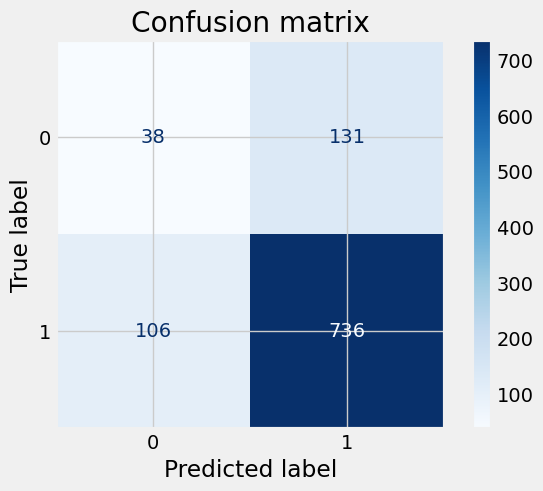

In [13]:
# Display confussion matrix
disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        display_labels=model.classes_,
        cmap=plt.cm.Blues
    )
disp.ax_.set_title('Confusion matrix')
plt.show()

In [14]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.26      0.22      0.24       169
           1       0.85      0.87      0.86       842

    accuracy                           0.77      1011
   macro avg       0.56      0.55      0.55      1011
weighted avg       0.75      0.77      0.76      1011



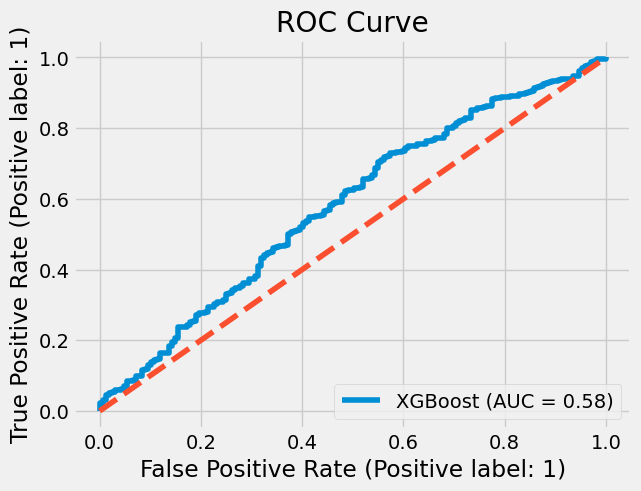

In [15]:
# Display ROCCurve 
disp_roc = RocCurveDisplay.from_estimator(
            model, 
            X_test, 
            y_test,
            name='XGBoost')
disp_roc.ax_.set_title('ROC Curve')
plt.plot([0,1], [0,1], linestyle='--')
plt.show()

# Hyper-parameter Tuning
Hyper-parameters are parameters that are not directly learnt within estimators. They are passed as arguments to the constructor of the estimator classes (Classifier in this case). It is possible and recommended to search the hyper-parameter space for the best cross validation score. Any parameter provided when constructing an estimator may be optimized in this manner.

We will tune the hyperparameters to select the best score by TimeSeriesSplit cross-validation. This is a variation of KFold. In the kth split, it returns first k folds as train set and the (k+1)th fold as test set. Unlike standard cross-validation methods, successive training sets are supersets of those that come before them.

## XGBoost's hyper-parameter

XGBoost has plethora of tuning parameters includeing the regulatization parameters and some of the most common hyperparameters are:

- `learning rate`: step size shrinkage used in update to prevents overfitting. Range is [0,1].
- `max_depth`: maximum depth of a tree.
- `colsample_bytree`: percentage of features used per tree. High value can lead to overfitting.
- `min_child_weight`: minimum sum of instance weight needed in a child.
- `gamma`: minimum loss reduction required to make a further partition on a leaf node of the tree. Large gamma will lead to more conservative algorithm.
- `lambda`: L2 regularization term on weights. Increasing this value will make model more conservative. Normalised to number of training examples. [parameter for linear booster].

Refer [here](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters) for complete list of tuning parameters.

## Randomised Search

The RandomizedSearchCV implements a “fit” and a “score” method and perform randomized search on hyper parameters. The parameters of the estimator used to apply these methods are optimized by cross-validated search over parameter settings. In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions.

In [16]:
# Timeseries CV 3-split
# tscv = TimeSeriesSplit(n_splits=3, gap=1) # sklearn 1.0
# for train, test in tscv.split(X):
#     print(train, test)

In [17]:
# Cross-validation
tscv = TimeSeriesSplit(n_splits=5, gap=1)

In [18]:
# Get params list
model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': 0,
 'silent': True}

In [19]:
# Hyper parameter optimization
param_grid = {'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
              'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
              'min_child_weight': [1, 3, 5, 7],
              'gamma': [0.0, 0.1, 0.2 , 0.3, 0.4],
              'colsample_bytree': [0.3, 0.4, 0.5 , 0.7]}

In [20]:
%%time
# perform random search
rs = RandomizedSearchCV(model, param_grid, n_iter=100, scoring='f1', cv=tscv, verbose=0)
rs.fit(X_train, y_train, verbose=0)

CPU times: user 6min 28s, sys: 2min 7s, total: 8min 35s
Wall time: 1min 11s


RandomizedSearchCV(cv=TimeSeriesSplit(gap=1, max_train_size=None, n_splits=5, test_size=None),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=N...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=42, ...),
                   n_iter=100,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='f1')

In [21]:
# best parameters
rs.best_params_

{'min_child_weight': 5,
 'max_depth': 4,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'colsample_bytree': 0.3}

In [22]:
# best score
rs.best_score_

0.8129062919004684

## Tuned Model

Let's now train and predict the model with the best search parameter## Refit Model.

In [23]:
%%time
# Refit the XGB Classifier with the best params
cls = XGBClassifier(**rs.best_params_) 

cls.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='logloss',
        verbose=True)

[0]	validation_0-logloss:0.67952	validation_1-logloss:0.67389
[1]	validation_0-logloss:0.66729	validation_1-logloss:0.65592
[2]	validation_0-logloss:0.65600	validation_1-logloss:0.64094
[3]	validation_0-logloss:0.64570	validation_1-logloss:0.62637
[4]	validation_0-logloss:0.63629	validation_1-logloss:0.61444
[5]	validation_0-logloss:0.62787	validation_1-logloss:0.60303
[6]	validation_0-logloss:0.62007	validation_1-logloss:0.59153
[7]	validation_0-logloss:0.61288	validation_1-logloss:0.58082
[8]	validation_0-logloss:0.60627	validation_1-logloss:0.57076
[9]	validation_0-logloss:0.60012	validation_1-logloss:0.56159
[10]	validation_0-logloss:0.59461	validation_1-logloss:0.55307
[11]	validation_0-logloss:0.58936	validation_1-logloss:0.54579
[12]	validation_0-logloss:0.58454	validation_1-logloss:0.53854
[13]	validation_0-logloss:0.58012	validation_1-logloss:0.53239
[14]	validation_0-logloss:0.57611	validation_1-logloss:0.52576
[15]	validation_0-logloss:0.57237	validation_1-logloss:0.51983
[1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [24]:
# Return the evaluation results
evals_result = cls.evals_result()
evals_result

{'validation_0': OrderedDict([('logloss',
               [0.6795208706968998,
                0.6672907984407119,
                0.6559996620399244,
                0.6456970452318798,
                0.6362910473402732,
                0.6278736909043809,
                0.6200749344705444,
                0.6128778847069425,
                0.6062740608662802,
                0.6001230489712318,
                0.5946120859121232,
                0.5893607484344914,
                0.5845372741127439,
                0.5801193426807063,
                0.5761065198707015,
                0.5723672590278146,
                0.5690417138842584,
                0.5656266628206882,
                0.5626665737158351,
                0.5598300451722854,
                0.5571819669667253,
                0.5548750114284645,
                0.5525737646529499,
                0.5503453917943278,
                0.5483674316264131,
                0.5463281133417855,
                0.5445

In [25]:
# Cross validation score
score = cross_val_score(cls,X_train,y_train,cv=tscv)
print(f'Mean CV Score : {score.mean():0.4}')

Mean CV Score : 0.7135


# Feature Importance

Feature Importance refers to techniques that calculate a score for all the input features for a given model where the scores represent the “importance” of each feature. It is calculated as the decrease in node impurity weighted by the probability of reaching that node. The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. The higher the value the more important the feature.

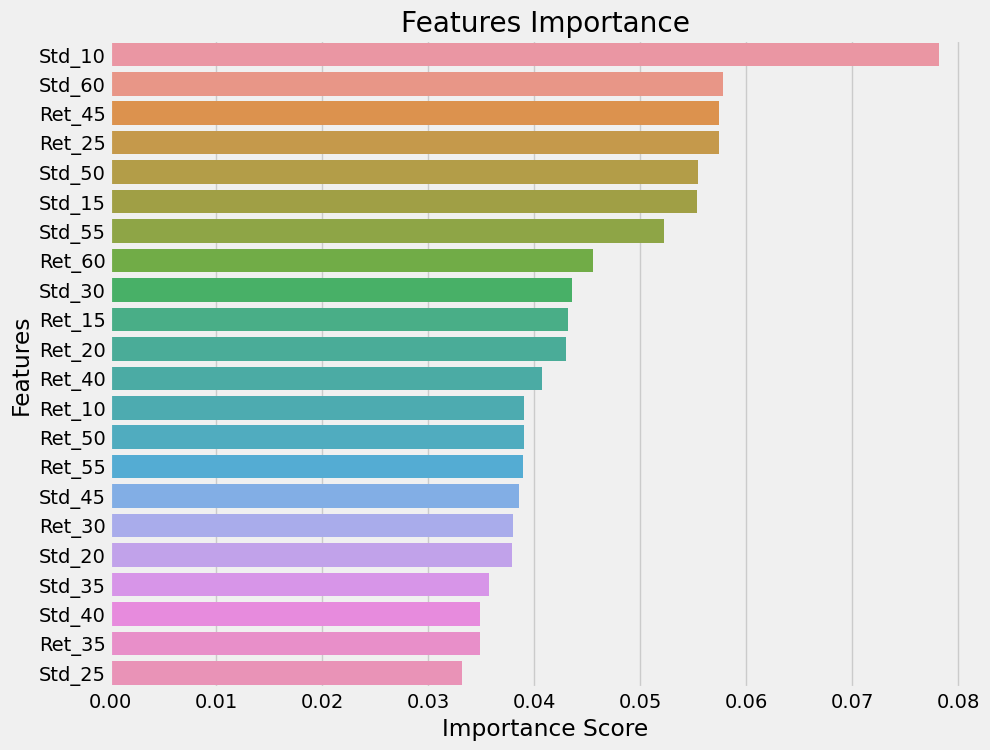

In [26]:
# Plot feature importance
fig, ax = plt.subplots(figsize=(10,8))
feature_imp = pd.DataFrame({'Importance Score': cls.feature_importances_,'Features': X.columns}).sort_values(by='Importance Score', ascending=False)

sns.barplot(x=feature_imp['Importance Score'], y=feature_imp['Features'])
ax.set_title('Features Importance');

Importance type can be either of the following:

- weight: the number of times a feature is used to split the data across all trees.
- gain: the average gain across all splits the feature is used in.
- cover: the average coverage across all splits the feature is used in.
- total_gain: the total gain across all splits the feature is used in.
- total_cover: the total coverage across all splits the feature is used in.

By default, `feature_importances_` rank features based on the average gain across all splits. This can be changed using the `plot_importance` method.

In [27]:
# plot_importance?

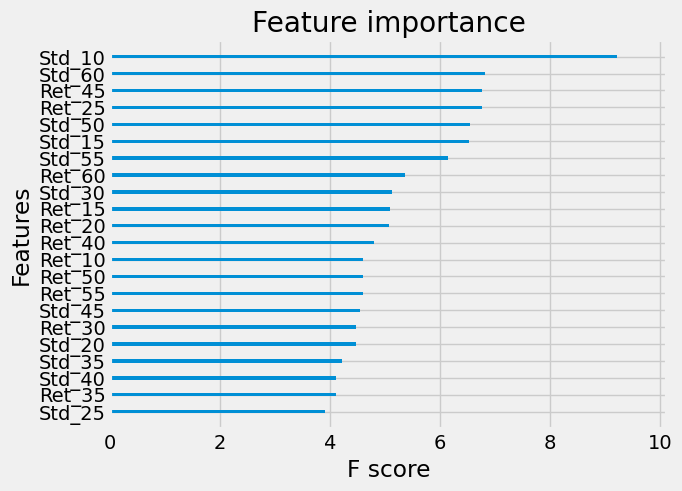

In [28]:
# feature importance_type = 'gain'
plot_importance(cls, importance_type='gain', show_values=False);

## Shap Values

SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. Shapley values are a widely used approach from cooperative game theory that come with desirable properties and is the average marginal contribution of a feature value across all possible coalitions.

In [29]:
import shap
explainer = shap.TreeExplainer(cls)
shap_values = explainer.shap_values(X_test)

## Visualize the feature importance

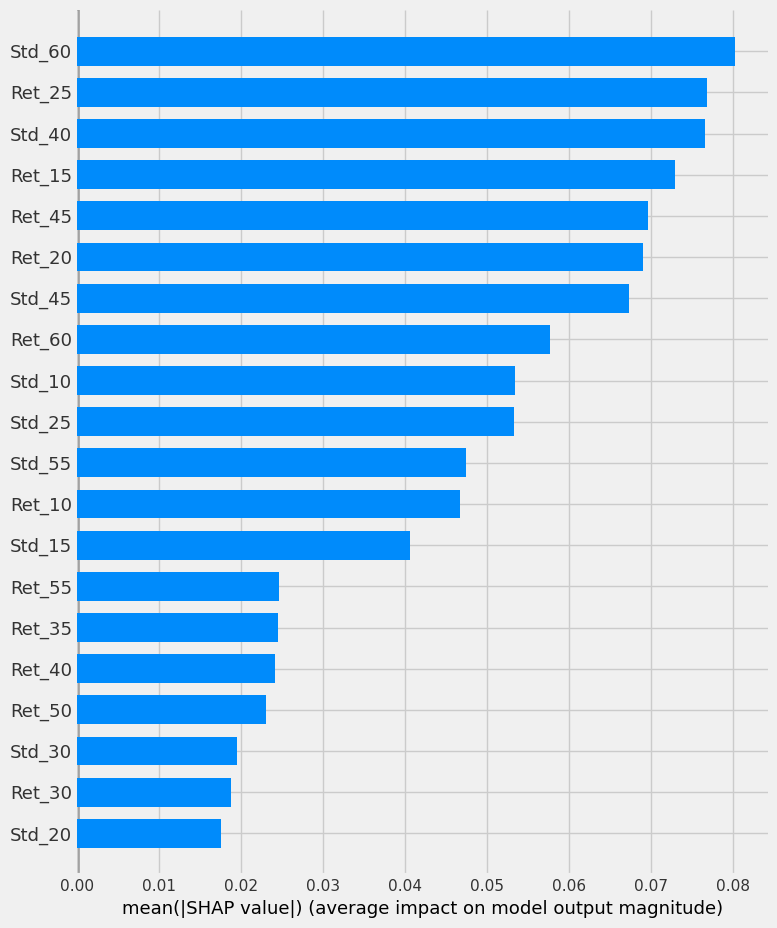

In [30]:
# future importance summary
shap.summary_plot(shap_values, X_test, plot_type="bar")

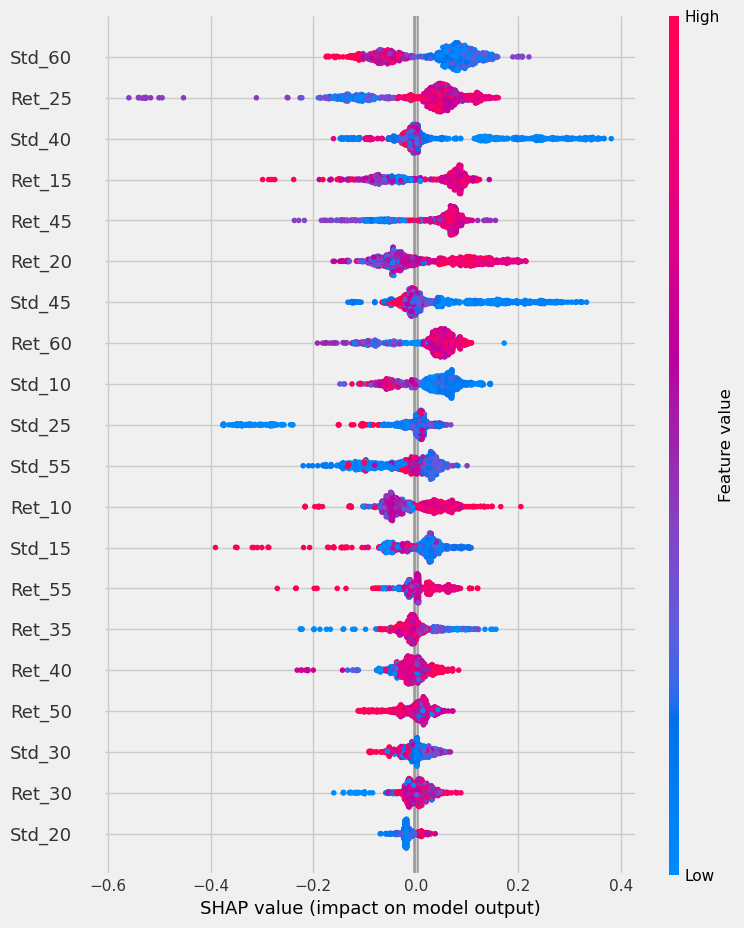

In [31]:
# interpretation plot
shap.summary_plot(shap_values, X_test)

## Plot Tree

In [32]:
!brew install graphviz

HOMEBREW_BREW_GIT_REMOTE set: using ... as the Homebrew/brew Git remote.
fatal: '...' does not appear to be a git repository
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.
==> Homebrew is run entirely by unpaid volunteers. Please consider donating:
  https://github.com/Homebrew/brew#donations

==> Auto-updated Homebrew!
Updated 1 tap (homebrew/core).

To reinstall 8.0.5, run:
  brew reinstall graphviz


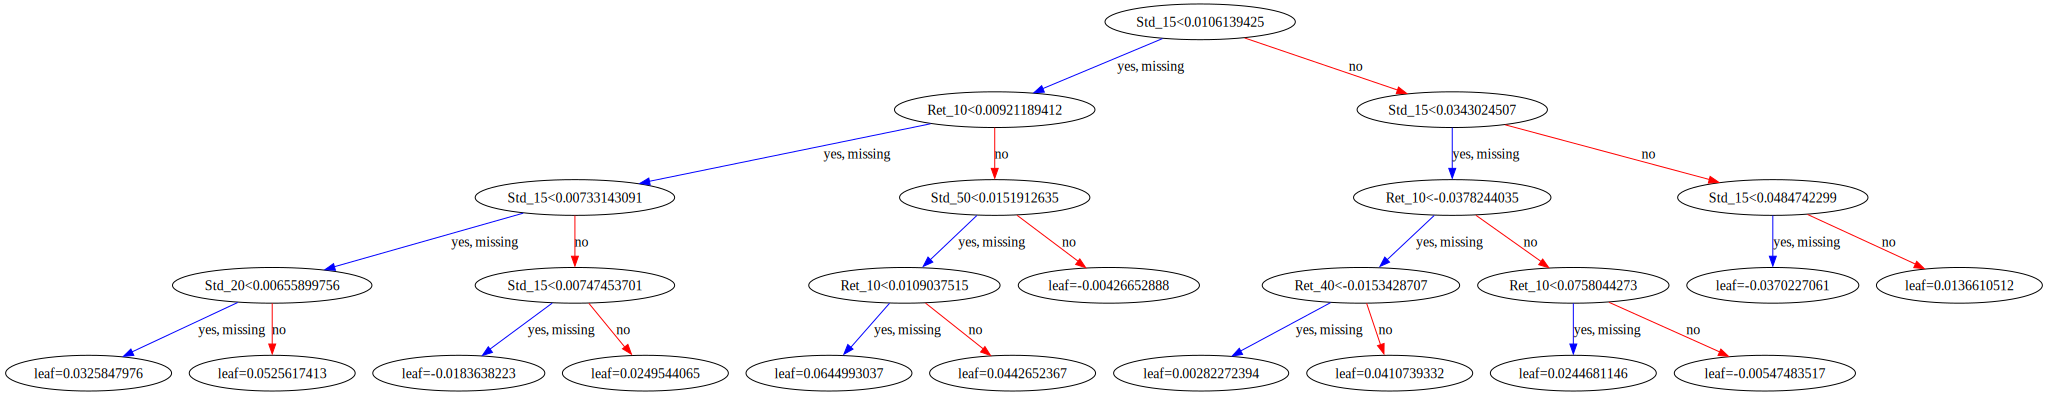

In [33]:
## Tree Visualization
# change tree number to see the corresponding plot
to_graphviz(cls, num_trees=10, rankdir='UT')

For a classification tree with two classes, the value of the leaf node represent the raw score. It can be converted to a probability score by using the logistic (sigmoid) function.

## Predict Model

In [34]:
# Predicting the test dataset
y_pred = cls.predict(X_test)

# Measure Accuracy
acc_train = accuracy_score(y_train, cls.predict(X_train))
acc_test = accuracy_score(y_test, y_pred)
# Print Accuracy
print(f'\n Training Accuracy \t: {acc_train :0.4} \n Test Accuracy \t\t: {acc_test :0.4}')


 Training Accuracy 	: 0.7551 
 Test Accuracy 		: 0.8309


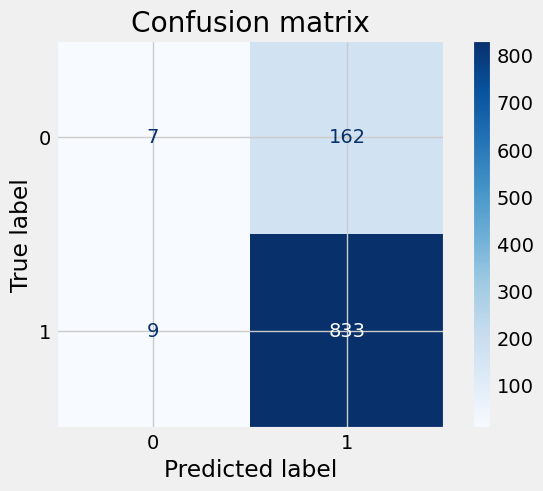

In [35]:
# Display confussion matrix
disp = ConfusionMatrixDisplay.from_estimator(
        cls,
        X_test,
        y_test,
        display_labels=model.classes_,
        cmap=plt.cm.Blues
    )
disp.ax_.set_title('Confusion matrix')
plt.show()

In [36]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.04      0.08       169
           1       0.84      0.99      0.91       842

    accuracy                           0.83      1011
   macro avg       0.64      0.52      0.49      1011
weighted avg       0.77      0.83      0.77      1011



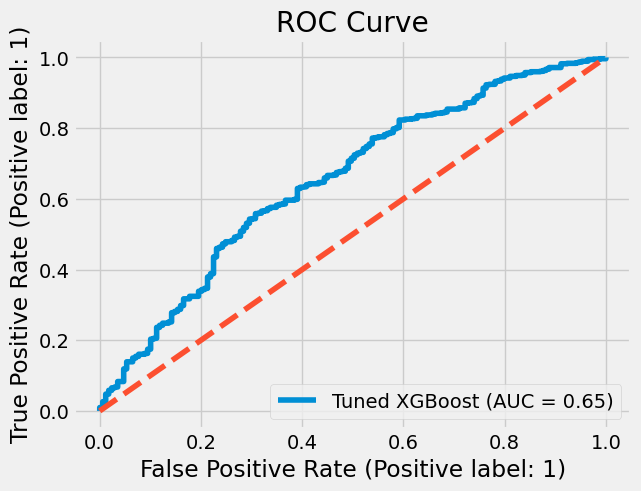

In [37]:
# Display ROCCurve 
disp_roc = RocCurveDisplay.from_estimator(
            cls, 
            X_test, 
            y_test,
            name='Tuned XGBoost')
disp_roc.ax_.set_title('ROC Curve')
plt.plot([0,1], [0,1], linestyle='--')
plt.show()